# Numerical stability of `ProjectedNormal`

In [1]:
import math
import torch
import pyro.distributions as dist
import matplotlib.pyplot as plt

In [2]:
def log_part_1(t):
    return t.square().mul(-0.5) - math.log(math.pi / 2) / 2

def part_1(t):
    t2 = t.square()
    return t2.mul(-0.5).exp() * (2 / math.pi) ** 0.5

def part_2(t):
    return t * (t * -0.5**0.5).erfc()

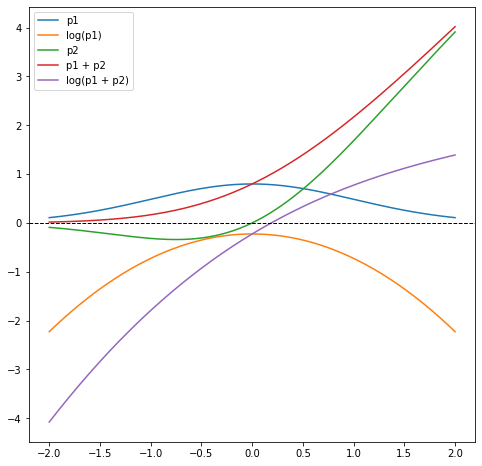

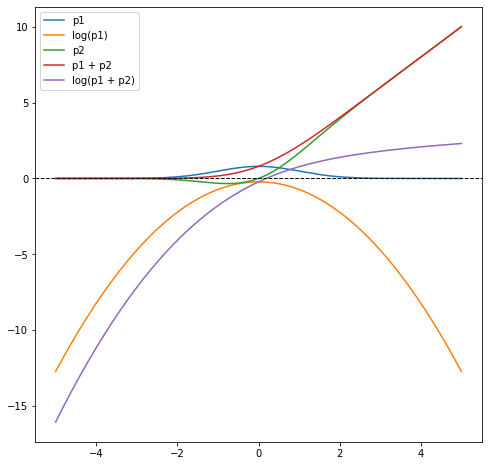

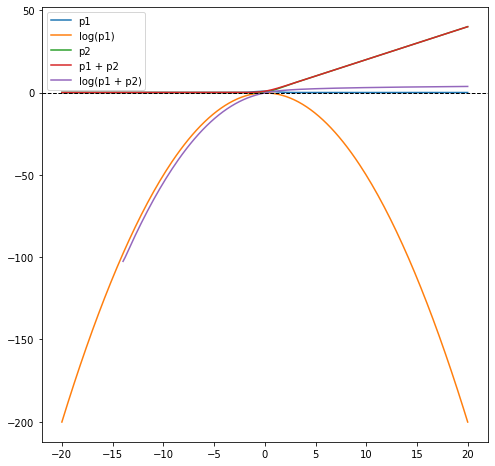

In [3]:
def plot_stability(extent):
    X = torch.linspace(-extent, extent, 200)
    p1 = part_1(X)
    p2 = part_2(X)
    plt.figure(figsize=(8,8))
    plt.plot(X, p1, label="p1")
    plt.plot(X, log_part_1(X), label="log(p1)")
    plt.plot(X, p2, label="p2")
    plt.plot(X, p1 + p2, label="p1 + p2")
    plt.plot(X, (p1 + p2).log(), label="log(p1 + p2)")
    plt.axhline(0, color="k", linestyle="--", lw=1)
    plt.legend(loc="best")

for e in [2, 5, 20]:
    plot_stability(e)

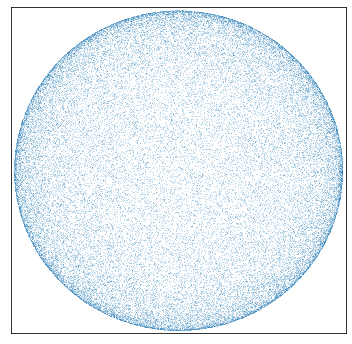

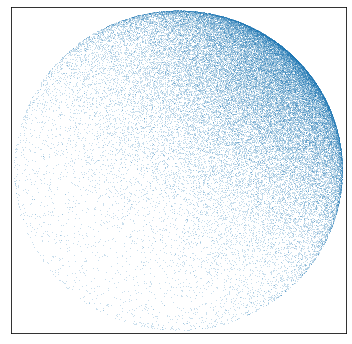

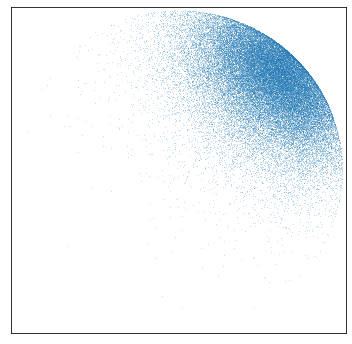

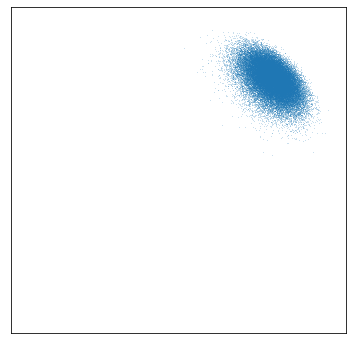

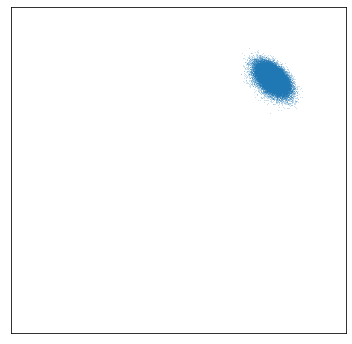

In [4]:
def plot_moon(dim=3, strength=0):
    concentration = torch.full((dim,), float(strength))
    values = dist.ProjectedNormal(concentration).sample([50000])
    plt.figure(figsize=(6, 6))
    plt.scatter(values[:, 0].numpy(), values[:, 1].numpy(), 1, alpha=0.3, lw=0)
    plt.xticks(())
    plt.yticks(())
    plt.xlim(-1.02, 1.02)
    plt.ylim(-1.02, 1.02)
    
plot_moon(strength=0)
plot_moon(strength=1)
plot_moon(strength=2)
plot_moon(strength=5)
plot_moon(strength=10)